In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# code pour importer les différents fichiers

In [2]:
def extract(data_dir, prefix, start_week, end_week):
    """ Extract a temporal slice of data for a given data source.
    
    Parameters
    ----------
    data_dir: str
        Data directory path.
    start_week: int
        First week number (included)
    end_week: int
        Last week number (included)
    prefix: str
        Data source identification (e.g. restaurant_1)
    """
    df = pd.DataFrame()
    
    for i in range(start_week, end_week+1):
        file_path = os.path.join(data_dir, 'data', f'{prefix}_week_{i}.csv')

        if os.path.isfile(file_path):
            batch = pd.read_csv(file_path)
            df = pd.concat([df, batch], sort=True)
    
    return df

def clean(df):
    """Clean dataframe."""
    
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    df['order_date'] = pd.to_datetime(df['order_date'])
    df = df.rename(columns={'order_number': 'order_id'})
    df = df.sort_values('order_date')
    df['total_product_price'] = df['quantity'] * df['product_price']
    df['cash_in'] = df.groupby('order_id')['total_product_price'].transform(np.sum)
    df = df.drop(columns=['item_name', 'quantity', 'product_price', 
                          'total_products', 'total_product_price'],
                errors="ignore")
    df = df.drop_duplicates()
    df = df.reset_index(drop=True)
    return df

def merge(df1, df2):
    df = pd.concat([df1, df2])
    df = df.drop(columns = ['order_id'])
    df = df.sort_values('order_date')
    df = df.reset_index(drop=True)
    return df

def resample(df): 
    df = df.resample('1H', on='order_date').sum().reset_index()
    return df

# Extraire tous les fichiers du restaurant 1 entre deux dates 
+ creation notion ca

In [5]:
# Restaurant 1
df1 = extract(data_dir= "C:/Users/182700/Documents/MLOPS/TD_ML_2024",
       prefix="restaurant_1" , start_week=108, end_week=110)
df1 = clean(df1)

C:\Users\182700\AppData\Local\Temp\ipykernel_8244\1340823922.py:34: FutureWarning: The provided callable <function sum at 0x000002DAFEA423E0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df['cash_in'] = df.groupby('order_id')['total_product_price'].transform(np.sum)


# Extraire tous les fichiers du restaurant 2 entre deux dates
+ creation notion ca

In [6]:
# Restaurant 2
df2 = extract(data_dir= "C:/Users/182700/Documents/MLOPS/TD_ML_2024",
       prefix="restaurant_2" , start_week=108, end_week=110)
df2 = clean(df2)

C:\Users\182700\AppData\Local\Temp\ipykernel_8244\1340823922.py:34: FutureWarning: The provided callable <function sum at 0x000002DAFEA423E0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df['cash_in'] = df.groupby('order_id')['total_product_price'].transform(np.sum)


# Fusionner les fichiers du resto 1 et 2

In [7]:
df = merge(df1, df2)
df

,order_date,cash_in
0,2017-01-23 16:01:00,35.75
1,2017-01-23 16:54:00,44.65
2,2017-01-23 17:33:00,37.70
3,2017-01-23 17:52:00,29.00
4,2017-01-23 18:07:00,37.70
...,...,...
518,2017-02-12 21:06:00,17.75
519,2017-02-12 21:16:00,19.85
520,2017-02-12 21:25:00,19.75
521,2017-02-12 21:30:00,47.15


# Modification de l'heure 

In [8]:
df = resample(df)
df.head()

C:\Users\182700\AppData\Local\Temp\ipykernel_8244\1340823922.py:50: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample('1H', on='order_date').sum().reset_index()


,order_date,cash_in
0,2017-01-23 16:00:00,80.40
1,2017-01-23 17:00:00,66.70
2,2017-01-23 18:00:00,64.00
3,2017-01-23 19:00:00,219.05
4,2017-01-23 20:00:00,111.25


# Création du graphique permettant de visualiser le CA en fonction du jour et de l'heure 

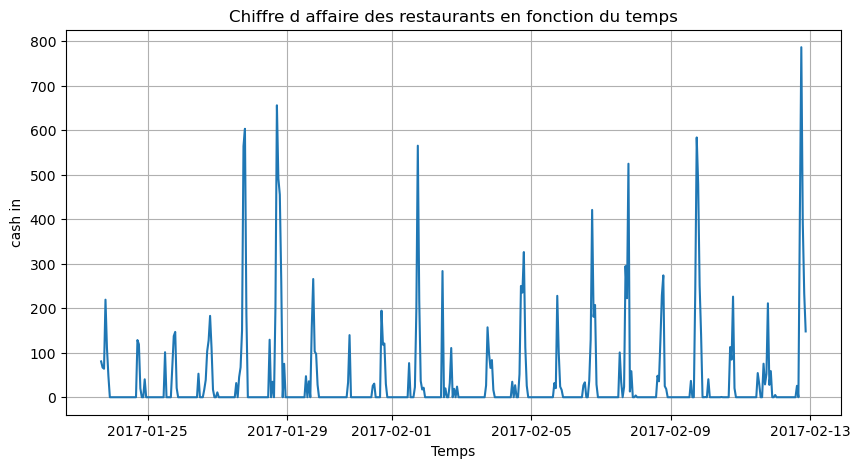

In [9]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.plot(df['order_date'], df['cash_in'])
ax.set_title('Chiffre d affaire des restaurants en fonction du temps')
ax.set_xlabel('Temps')
ax.set_ylabel('cash in')
plt.grid(True)

# Création de feature : 
jour de la semaine, heure, mois, CA à Week-1

In [12]:
df['day'] = df['order_date'].dt.day
df['month'] = df['order_date'].dt.month
df['hour'] = df['order_date'].dt.hour

In [13]:
df.head(5)


,order_date,cash_in,day,month,hour
0,2017-01-23 16:00:00,80.40,23,1,16
1,2017-01-23 17:00:00,66.70,23,1,17
2,2017-01-23 18:00:00,64.00,23,1,18
3,2017-01-23 19:00:00,219.05,23,1,19
4,2017-01-23 20:00:00,111.25,23,1,20
